In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
experience_version_report = 3

In [3]:
# 0.634 --> Experience 1
# 0.777 --> Experience 2
# 0.592 --> Experience 3
df = None
dummy_score = 0
if experience_version_report == 1:
    df = pd.read_excel('./Output/Results_ML_OFICIAL4.xlsx', sheet_name="Original")
    dummy_score = 0.634
elif experience_version_report == 2:
    df = pd.read_excel('./Output/Results_ML_OFICIAL4.xlsx', sheet_name="ProjetosAnulados_Filtrados")
    dummy_score = 0.777
else:
    df = pd.read_excel('./Output/Results_ML_OFICIAL4.xlsx', sheet_name="NewDataset")
    dummy_score = 0.592


In [4]:
df

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.971549,0.964981,0.932331,1.000000,...,0.583333,0.617658,105,148,79,75,577,372,227,180
1,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.546891,0.601113,0.458924,0.870968,...,0.822222,0.571904,148,73,154,32,577,372,227,180
2,K-NearestNeighbors,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.727081,0.626263,0.676012,0.583333,...,0.422222,0.550318,76,154,73,104,577,372,227,180
3,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.645943,0.577889,0.542453,0.618280,...,0.566667,0.622540,102,154,73,78,577,372,227,180
4,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.704953,0.525424,0.711009,0.416667,...,0.427778,0.638999,77,193,34,103,577,372,227,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,MLPClassifier,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.805893,0.801770,0.819168,0.785095,...,0.605556,0.677227,109,170,57,71,577,577,227,180
446,Perceptron,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.593588,0.674532,0.562500,0.842288,...,0.783333,0.561270,141,77,150,39,577,577,227,180
447,RandomForest,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.976603,0.977138,0.955298,1.000000,...,0.644444,0.692266,116,168,59,64,577,577,227,180
448,SupportVectorClassification,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.727903,0.701521,0.776842,0.639515,...,0.577778,0.676554,104,176,51,76,577,577,227,180


In [5]:
#display(df_clean.loc[:, ['Model', 'Experience', 'Features_List', 'Accuracy_Test']].sort_values(by=['Accuracy_Test'], ascending=False))

### Filtrar experiência com resultados inferiores ou iguais ao Dummy + Modelos overfit

In [6]:
select_columns = [
    'Model',
    'Experience',
    'ExperienceNumber',
    'ExperienceVersion',
    'Features_List',
    'Nr_Features',
    'Accuracy_Test',
    'F1_Test',
    'Precision_Test',
    'Recall_Test',
    'ROC_AUC_Test',
    'TP',
    'TN',
    'FP',
    'FN',
    '#Terminados(Teste)',
    '#AnuladosPosContrato(Teste)'
]

In [7]:
# Excluir experiencias com precisão de teste inferior ao dummy + experiências em que a precisão nos datasets de treino sejam = 1
df_clean = df.loc[(df['Accuracy_Test'] >= dummy_score) & (df['Accuracy_Train'] != 1)]

In [8]:
print('Número de experiências em que o modelo deu overfit: ', len(df[df['Accuracy_Train'] ==1]))

Número de experiências em que o modelo deu overfit:  0


In [9]:
print('Número de experiências em que o modelo não superou o dummy: ', len(df[df['Accuracy_Test'] < dummy_score]))

Número de experiências em que o modelo não superou o dummy:  32


In [10]:
df.shape

(450, 24)

In [11]:
df_clean.shape

(418, 24)

In [12]:
print("Filtraram-se %i registos" % (df.shape[0] - df_clean.shape[0]))

Filtraram-se 32 registos


In [13]:
display(df_clean[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,DecisionTree,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.621622,0.576923,0.570652,0.583333,0.617658,105,148,79,75,227,180
3,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.628993,0.574648,0.582857,0.566667,0.622540,102,154,73,78,227,180
4,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180
5,MLPClassifier,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.636364,0.593407,0.586957,0.600000,0.632599,108,151,76,72,227,180
7,RandomForest,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.690418,0.585526,0.717742,0.494444,0.670130,89,192,35,91,227,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,LogisticRegression,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.614251,0.574526,0.560847,0.588889,0.611625,106,144,83,74,227,180
445,MLPClassifier,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.685504,0.630058,0.656627,0.605556,0.677227,109,170,57,71,227,180
447,RandomForest,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.697789,0.653521,0.662857,0.644444,0.692266,116,168,59,64,227,180
448,SupportVectorClassification,StandardScaler + SMOTE + UnderSampling (withou...,5,3,manualFeat,22,0.687961,0.620896,0.670968,0.577778,0.676554,104,176,51,76,227,180


In [14]:
list_models_clean = df_clean['Model'].unique().tolist()
list_models_original = df['Model'].unique().tolist()

In [15]:
print('Modelos excluídos')
print(list(set(list_models_original) - set(list_models_clean)))

Modelos excluídos
[]


# Análise de resultados

Foram realizadas 3 tipos de experiências para 3 datasets diferentes:

    1. Com os dados originais em que foram filtrados projetos em que não conseguíamos obter informação antes do ano de candidatura

    2. Aplicação de mais um filtro de projetos para a classe dos projetos anulados. Dentro dos projetos anulados foram apenas escolhidos os projetos em que o motivo de anulação foi devido à "Desistência do promotor".
    
    3. Inclusão dos projetos filtrados inicialmente no ponto 1, são incluído no dataset no entanto todas as features relacionadas com os rácios de performance em relação ao projeto são substituídos pelo valor 0. Aumentando o conjunto de dados. 

### Retirar os melhores resultados para cada modelo

In [16]:
# Pode haver vários modelos com scores as melhores score
best_models = df_clean.groupby('Model')['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models)

,Model,max
0,DecisionTree,0.675676
1,GaussianNaiveBayes,0.675676
2,K-NearestNeighbors,0.710074
3,LinearSupportVectorClassification,0.690418
4,LogisticRegression,0.705160
5,MLPClassifier,0.710074
6,Perceptron,0.700246
7,RandomForest,0.722359
8,SupportVectorClassification,0.697789
9,XGBoost,0.719902


#### O que se observar
1. Observar A experiencia que se repete mais
2. O tipo de features mais utilizadas
3. Observação da evolução das métricas ao longo das experiências

In [17]:
value_experience_counts = df_clean['ExperienceNumber'].value_counts()
value_features_counts = df_clean['Features_List'].value_counts()

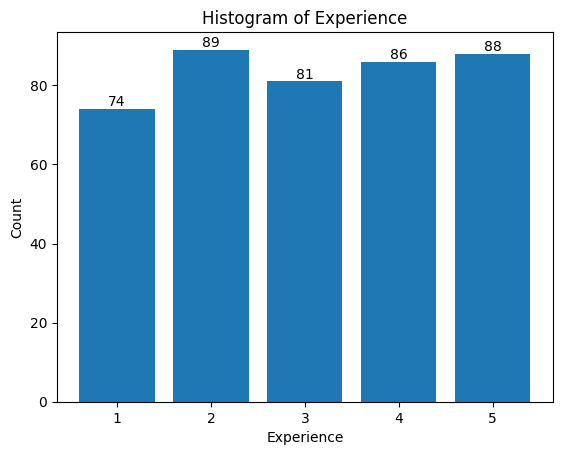

In [18]:
# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(value_experience_counts.index, value_experience_counts.values)

# Add values on top of each bar using ax.bar_label()
ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)

# Set labels and title
ax.set_xlabel('Experience')
ax.set_ylabel('Count')
ax.set_title('Histogram of Experience')

# Show the plot
plt.show()

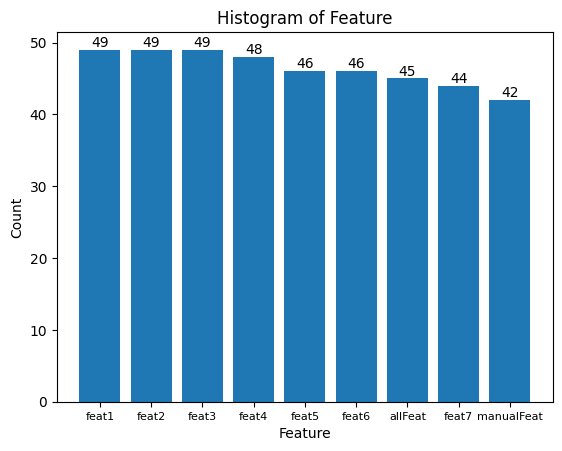

In [19]:
# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(value_features_counts.index, value_features_counts.values)

# Add values on top of each bar using ax.bar_label()
ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)

# Set labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('Count')
ax.set_title('Histogram of Feature')
plt.xticks(size = 8)

# Show the plot
plt.show()

In [20]:
# # Plot the histogram
# plt.bar(value_experience_counts.index, value_experience_counts.values)
# plt.xlabel('Experience')
# plt.ylabel('Count')
# plt.title('Histogram of Experience')
# plt.show()

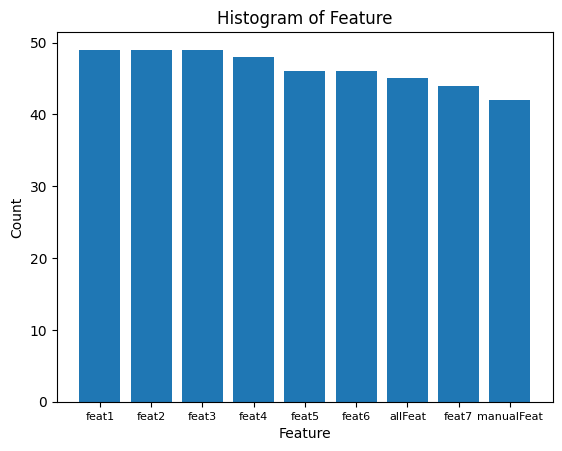

In [21]:
# Plot the histogram
plt.bar(value_features_counts.index, value_features_counts.values)
plt.xlabel('Feature')
plt.xticks(size = 8)
plt.ylabel('Count')
plt.title('Histogram of Feature')
plt.show()

In [22]:
final_best_models = df_clean.merge(best_models, how="inner", left_on=["Model", "Accuracy_Test"], right_on=["Model", "max"])

display(final_best_models[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,XGBoost,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.719902,0.654545,0.720000,0.600000,0.707489,108,185,42,72,227,180
1,XGBoost,StandardScaler (without projects filtering),2,3,allFeat,267,0.719902,0.654545,0.720000,0.600000,0.707489,108,185,42,72,227,180
2,DecisionTree,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
3,DecisionTree,StandardScaler (without projects filtering),2,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
4,MLPClassifier,StandardScaler (without projects filtering),2,3,feat2,30,0.710074,0.628931,0.724638,0.555556,0.694077,100,189,38,80,227,180
5,K-NearestNeighbors,StandardScaler (without projects filtering),2,3,feat3,50,0.710074,0.650888,0.696203,0.611111,0.699829,110,179,48,70,227,180
6,K-NearestNeighbors,StandardScaler + PCA (without projects filtering),3,3,feat3,50,0.710074,0.650888,0.696203,0.611111,0.699829,110,179,48,70,227,180
7,LinearSupportVectorClassification,StandardScaler (without projects filtering),2,3,feat4,50,0.690418,0.580000,0.725000,0.483333,0.668979,87,194,33,93,227,180
8,LinearSupportVectorClassification,StandardScaler + PCA (without projects filtering),3,3,feat4,50,0.690418,0.580000,0.725000,0.483333,0.668979,87,194,33,93,227,180
9,LinearSupportVectorClassification,StandardScaler + SMOTE (without projects filte...,4,3,feat3,50,0.690418,0.646067,0.653409,0.638889,0.685083,115,166,61,65,227,180


#### Comparar os resultados com as várias experiências realizadas (Modelo_Experience)

In [23]:
# Obter os melhores resultados para cada feature + modelo 
best_models_feature = df_clean.groupby(['Model', 'Experience'])['Accuracy_Test'].max().to_frame(name = 'max').reset_index()
display(best_models_feature)

,Model,Experience,max
0,DecisionTree,Baseline no pre-processing (without projects f...,0.675676
1,DecisionTree,StandardScaler (without projects filtering),0.675676
2,DecisionTree,StandardScaler + PCA (without projects filtering),0.651106
3,DecisionTree,StandardScaler + SMOTE (without projects filte...,0.636364
4,DecisionTree,StandardScaler + SMOTE + UnderSampling (withou...,0.636364
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,0.597052
6,GaussianNaiveBayes,StandardScaler (without projects filtering),0.675676
7,GaussianNaiveBayes,StandardScaler + PCA (without projects filtering),0.624079
8,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,0.658477
9,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,0.658477


### Mediana dos scores das features e comparar

In [24]:
# Obter a mediana dos scores de cada feature_experience e perceber quais são as features que obtiveram a melhor performance
feature_median = df_clean.groupby(['Features_List']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(feature_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Features_List,,,,,
allFeat,0.668305,0.599388,0.640244,0.583333,0.660756
feat1,0.673219,0.589812,0.660000,0.544444,0.654907
feat2,0.656020,0.585075,0.648276,0.533333,0.645044
feat3,0.678133,0.596859,0.658824,0.572222,0.654895
feat4,0.681818,0.603659,0.665780,0.558333,0.667070
feat5,0.673219,0.601942,0.648810,0.591667,0.661509
feat6,0.659705,0.601215,0.661105,0.544444,0.645913
feat7,0.663391,0.601733,0.631579,0.575000,0.654528
manualFeat,0.646192,0.579532,0.654867,0.533333,0.634269


### Mediana dos scores dos modelos e comparar

In [25]:
# Obter a mediana dos scores de cada modelo e perceber quais são as features que obtiveram a melhor performance
model_median = df_clean.groupby(['Model']).agg({
    'Accuracy_Test': 'median',
    'F1_Test': 'median',
    'Precision_Test': 'median',
    'Recall_Test': 'median',
    'ROC_AUC_Test': 'median'
})
display(model_median)

,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test
Model,,,,,
DecisionTree,0.633907,0.594005,0.582888,0.605556,0.628573
GaussianNaiveBayes,0.598280,0.189055,0.951190,0.105556,0.547559
K-NearestNeighbors,0.660934,0.576687,0.641168,0.522222,0.646574
LinearSupportVectorClassification,0.665848,0.580000,0.634409,0.588889,0.656070
LogisticRegression,0.667076,0.576299,0.647807,0.500000,0.657868
MLPClassifier,0.685504,0.622857,0.654762,0.600000,0.677227
Perceptron,0.632678,0.601942,0.595031,0.636111,0.626909
RandomForest,0.695332,0.602985,0.703125,0.522222,0.674829
SupportVectorClassification,0.670762,0.588235,0.666667,0.572222,0.654528


### Obter gráfico evolução das métricas

In [26]:
# Selecionar as melhores scores para cada modelo_feature em cada experiência
df_best_models_feature = df.merge(best_models_feature, left_on=["Model", "Experience", "Accuracy_Test"], right_on=["Model", "Experience", "max"], how="inner")
display(df_best_models_feature[select_columns])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste)
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180
1,XGBoost,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.719902,0.654545,0.720000,0.600000,0.707489,108,185,42,72,227,180
2,DecisionTree,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.675676,0.629213,0.636364,0.622222,0.670142,112,163,64,68,227,180
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
6,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180
7,MLPClassifier,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.668305,0.589666,0.651007,0.538889,0.654907,97,175,52,83,227,180
8,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.658477,0.471483,0.746988,0.344444,0.625967,62,206,21,118,227,180
9,SupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.665848,0.636364,0.613402,0.661111,0.665357,119,152,75,61,227,180


In [27]:
# Organizar de acordo com as métricas
df_best_models_feature = df_best_models_feature.sort_values(['F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'])
df_best_models_feature['row_number'] = df_best_models_feature.groupby(["Model", "Experience"]).cumcount() + 1

display(df_best_models_feature)

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Train,F1_Train,Precision_Train,Recall_Train,...,TP,TN,FP,FN,#Terminados(Treino),#AnuladosPosContrato(Treino),#Terminados(Teste),#AnuladosPosContrato(Teste),max,row_number
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,1
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,2
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,3
6,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.649104,0.189781,1.000000,0.104839,...,16,227,0,164,577,372,227,180,0.597052,4
8,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.709168,0.492647,0.779070,0.360215,...,62,206,21,118,577,372,227,180,0.658477,1
40,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,4,3,feat6,50,0.650780,0.518519,0.834615,0.376083,...,66,202,25,114,577,577,227,180,0.658477,1
51,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat6,50,0.650780,0.518519,0.834615,0.376083,...,66,202,25,114,577,577,227,180,0.658477,1
10,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.690200,0.451493,0.737805,0.325269,...,67,208,19,113,577,372,227,180,0.675676,1
47,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat4,50,0.730503,0.694199,0.802273,0.611785,...,78,182,45,102,577,577,227,180,0.638821,1
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.704953,0.525424,0.711009,0.416667,...,77,193,34,103,577,372,227,180,0.663391,1


In [28]:
display(df_best_models_feature[['Model',
 'Experience',
 'ExperienceNumber',
 'ExperienceVersion',
 'Features_List',
 'Nr_Features',
 'Accuracy_Test',
 'F1_Test',
 'Precision_Test',
 'Recall_Test',
 'ROC_AUC_Test',
 'TP',
 'TN',
 'FP',
 'FN',
 '#Terminados(Teste)',
 '#AnuladosPosContrato(Teste)',
 "row_number"
 ]])

,Model,Experience,ExperienceNumber,ExperienceVersion,Features_List,Nr_Features,Accuracy_Test,F1_Test,Precision_Test,Recall_Test,ROC_AUC_Test,TP,TN,FP,FN,#Terminados(Teste),#AnuladosPosContrato(Teste),row_number
3,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,1
4,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat2,30,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,2
5,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,3
6,GaussianNaiveBayes,Baseline no pre-processing (without projects f...,1,3,feat4,50,0.597052,0.163265,1.000000,0.088889,0.544444,16,227,0,164,227,180,4
8,Perceptron,Baseline no pre-processing (without projects f...,1,3,feat1,30,0.658477,0.471483,0.746988,0.344444,0.625967,62,206,21,118,227,180,1
40,GaussianNaiveBayes,StandardScaler + SMOTE (without projects filte...,4,3,feat6,50,0.658477,0.487085,0.725275,0.366667,0.628267,66,202,25,114,227,180,1
51,GaussianNaiveBayes,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat6,50,0.658477,0.487085,0.725275,0.366667,0.628267,66,202,25,114,227,180,1
10,LinearSupportVectorClassification,Baseline no pre-processing (without projects f...,1,3,feat3,50,0.675676,0.503759,0.779070,0.372222,0.644261,67,208,19,113,227,180,1
47,K-NearestNeighbors,StandardScaler + SMOTE + UnderSampling (withou...,5,3,feat4,50,0.638821,0.514851,0.634146,0.433333,0.617548,78,182,45,102,227,180,1
0,LogisticRegression,Baseline no pre-processing (without projects f...,1,3,allFeat,267,0.663391,0.529210,0.693694,0.427778,0.638999,77,193,34,103,227,180,1


In [29]:
clean_df_best_models_feature = df_best_models_feature.loc[df_best_models_feature['row_number'] == 1].sort_values(by=["Model", "ExperienceNumber"])

In [30]:
graph_df = clean_df_best_models_feature[select_columns].copy().reset_index()

In [31]:
# display(graph_df)

In [32]:
def get_model_metric(df, model_name, metric):
    return df.loc[df['Model'] == model_name, metric + ['ExperienceNumber']]

In [33]:
# def show_report(df, model_name, metric):
#     #df.reset_index()
#     metric_c = metric + "_Test"
#     # Plot the data using Matplotlib
#     plt.figure(figsize=(10, 6))
#     plt.plot(df['ExperienceNumber'], df[metric_c], marker='o')

#     # Add labels, title, and legend
#     plt.xlabel('Experience')
#     plt.ylabel(metric)
#     plt.title('Evolution of %s %s across Experiences' % (model_name, metric))
#     plt.legend()

#     # Show the plot
#     plt.xticks(np.arange(1, 6, 1))
#     plt.savefig("./Analysis_Results/Experience" + str(experience_version_report) + "/" + model_name + "/" + metric)
#     plt.grid(True)
#     plt.show()

In [34]:
def show_report(df, model_name, metrics_list):
    # Create the subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    coord = [[0, 0], [0, 1], [1, 0], [1, 1]]
    coord_metrics = list(zip(coord, metrics_list))
    fig.suptitle("Evolution of %s across Experiences" % (model_name))
    for coord, metric in coord_metrics:
        metric_c = metric + "_Test"
        # Plot the data using Matplotlib
        axes[coord[0], coord[1]].set_xlabel('Experience')
        axes[coord[0], coord[1]].set_xticks(np.arange(1, 6, 1))
        axes[coord[0], coord[1]].set_ylabel(metric_c)
        axes[coord[0], coord[1]].set_title('%s' % (metric), pad=20)
        axes[coord[0], coord[1]].plot(df['ExperienceNumber'], df[metric_c], marker='o')
        for xi, yi in zip(df['ExperienceNumber'], df[metric_c]):
            axes[coord[0], coord[1]].annotate(f'{yi:.2f}', (xi, yi), textcoords="offset points", xytext=(0,10), ha='center')
        
    # Adjust the layout
    plt.tight_layout()
    plt.savefig("./Analysis_Results/Experience" + str(experience_version_report) + "/" + model_name)

In [35]:
models_list = [
"GaussianNaiveBayes",
"K-NearestNeighbors",
"LinearSupportVectorClassification",
"LogisticRegression",
"MLPClassifier",
"Perceptron",
"RandomForest",
"SupportVectorClassification",
"XGBoost"
]

metrics_list = ['Accuracy', 'F1', 'Recall', 'Precision', 'ROC_AUC']

metrics_c_list = ['Accuracy_Test', 'F1_Test', 'Recall_Test', 'Precision_Test', 'ROC_AUC_Test']

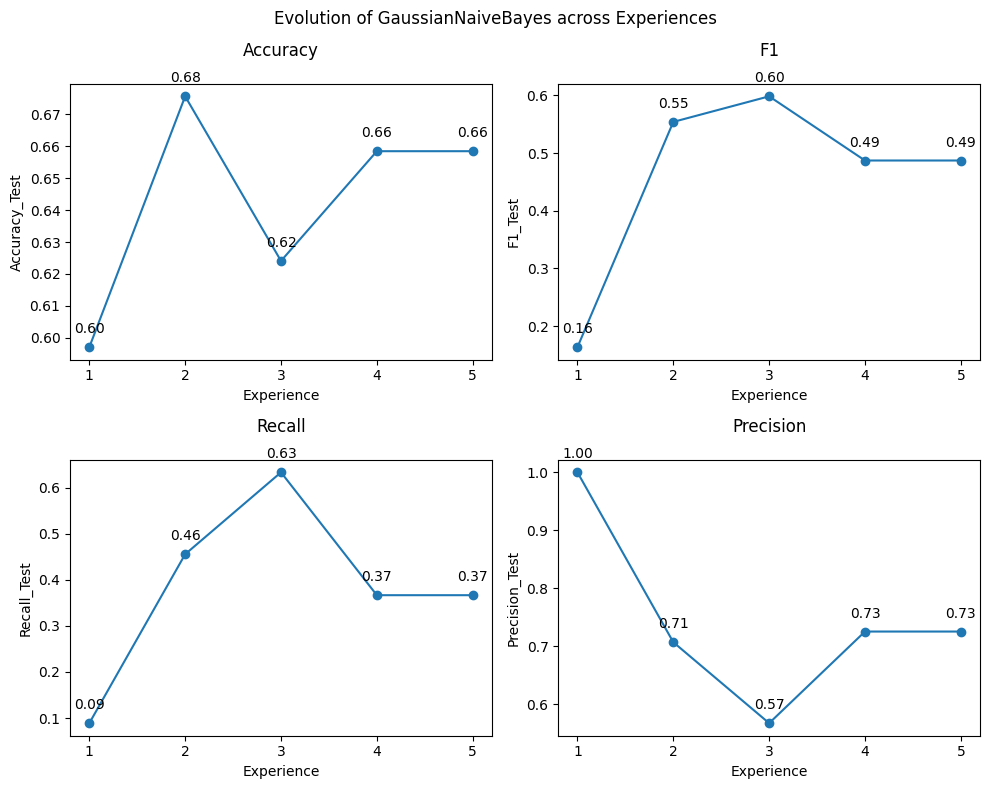

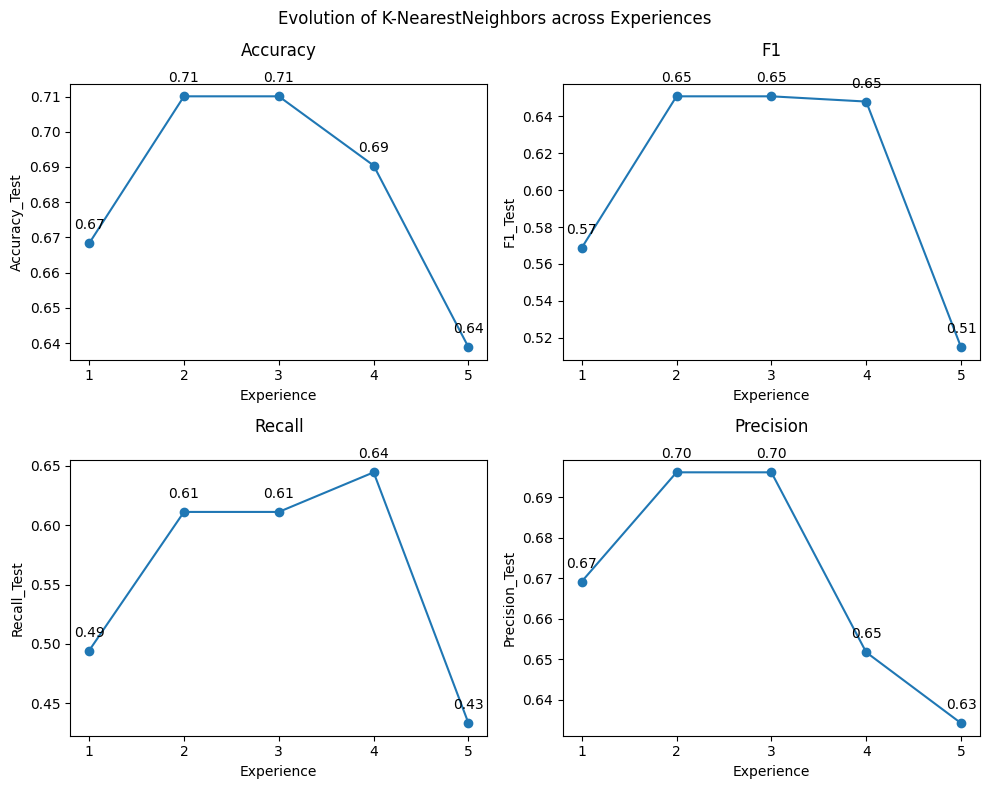

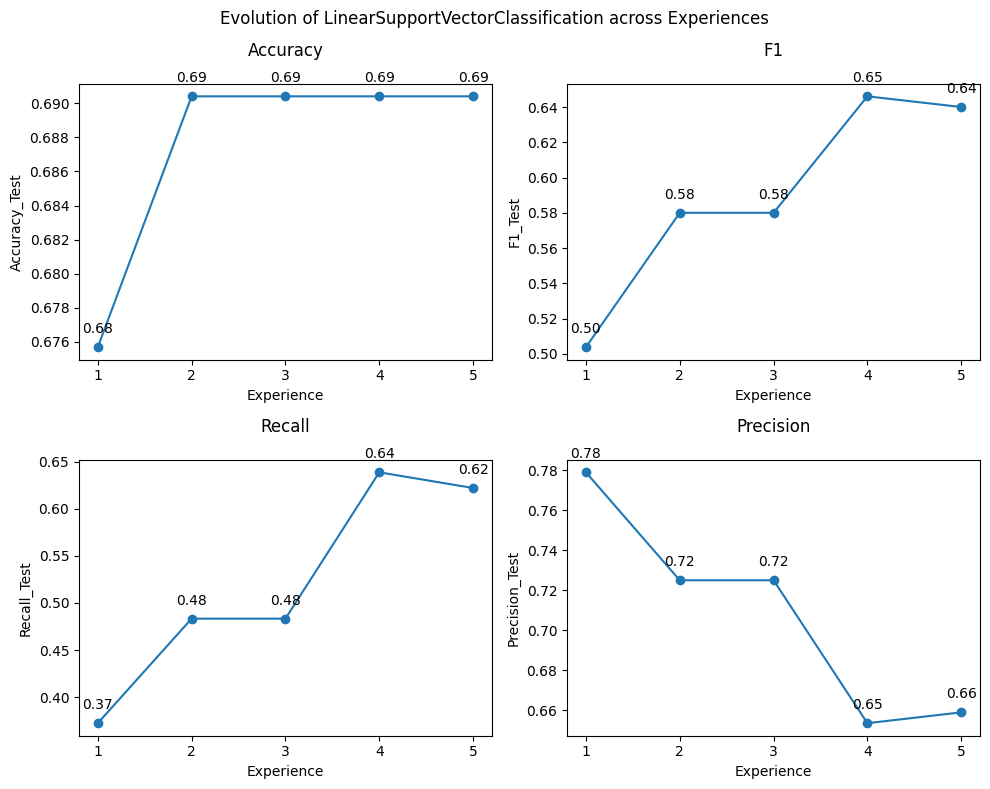

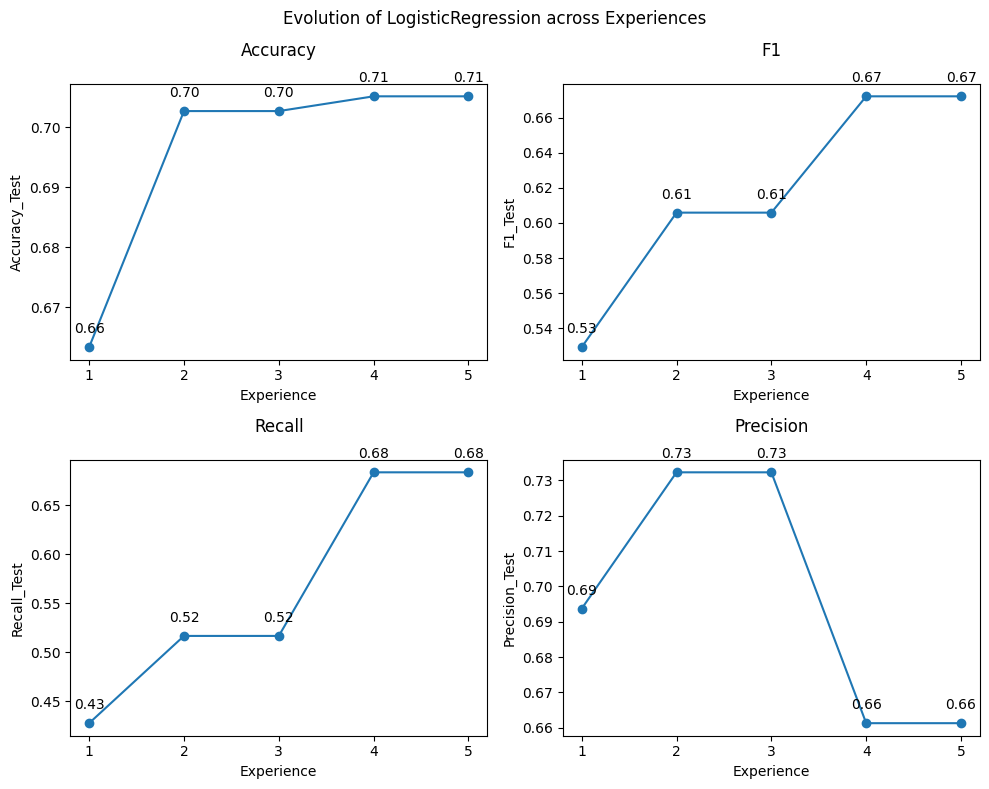

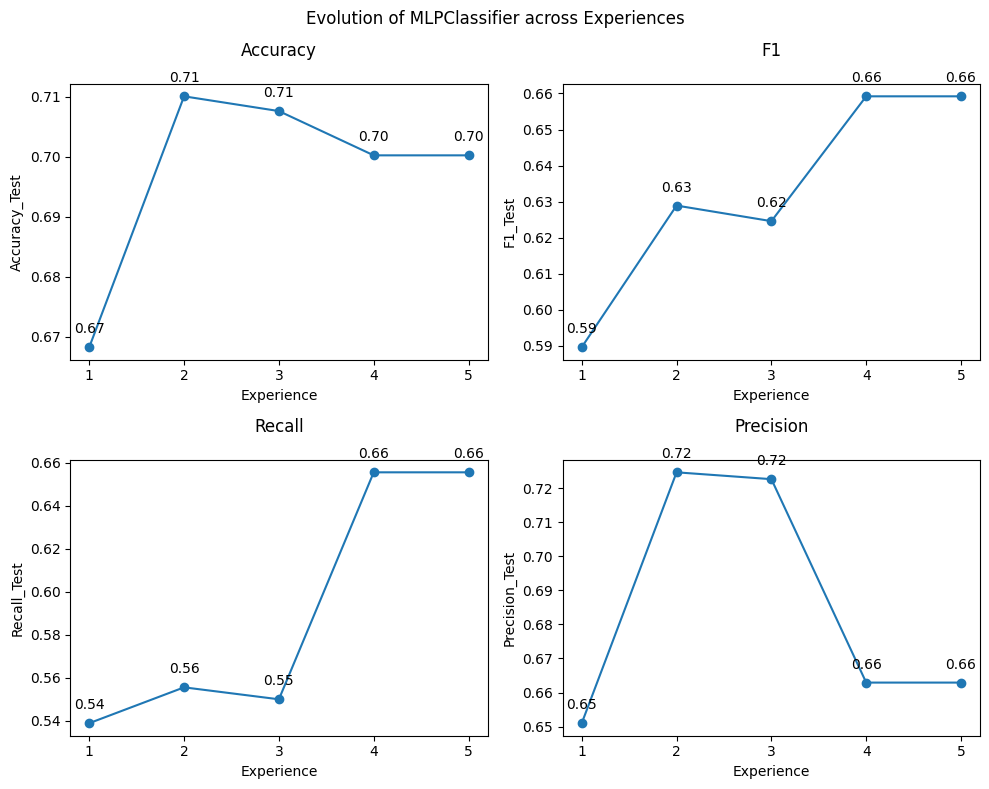

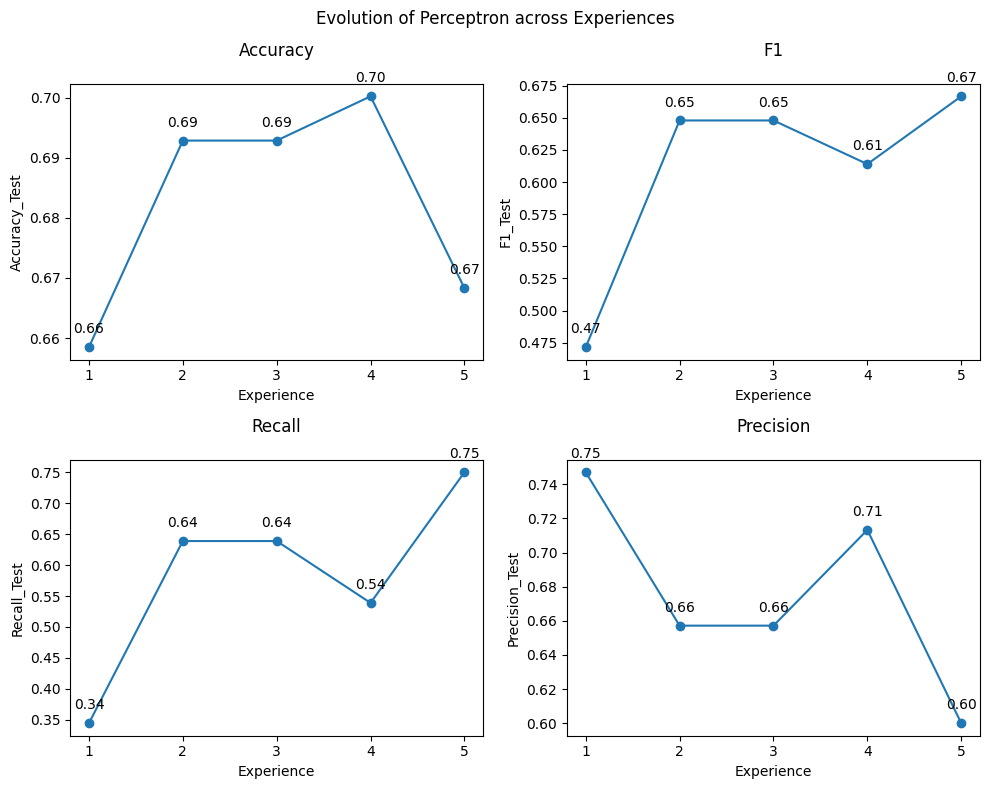

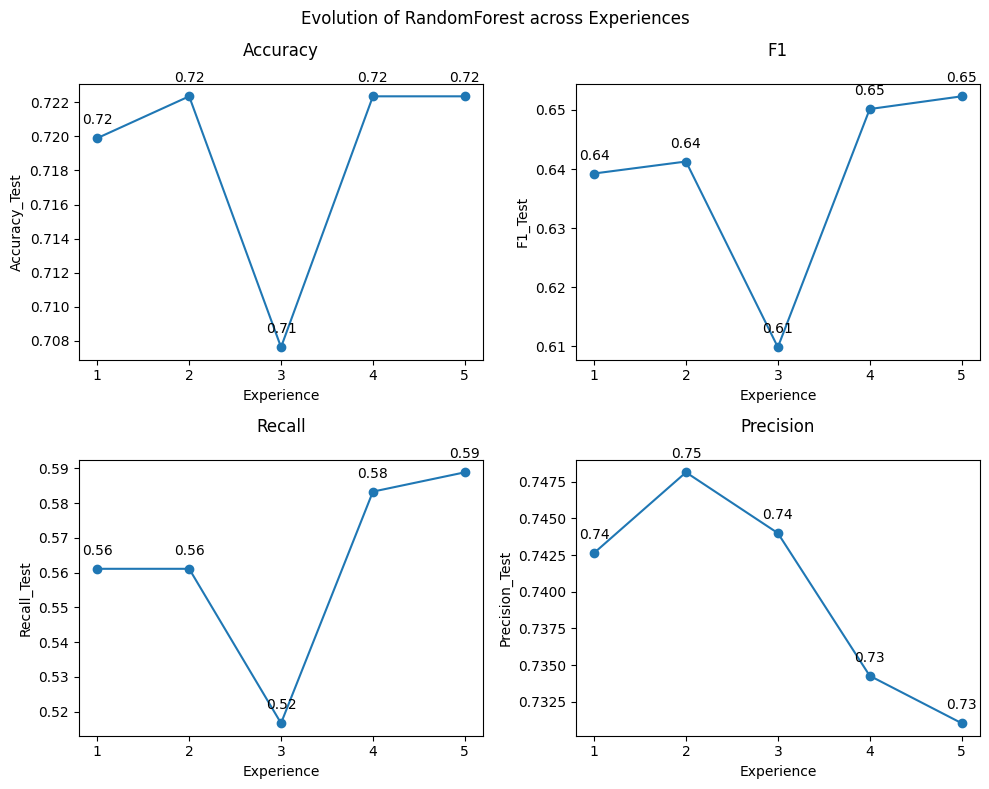

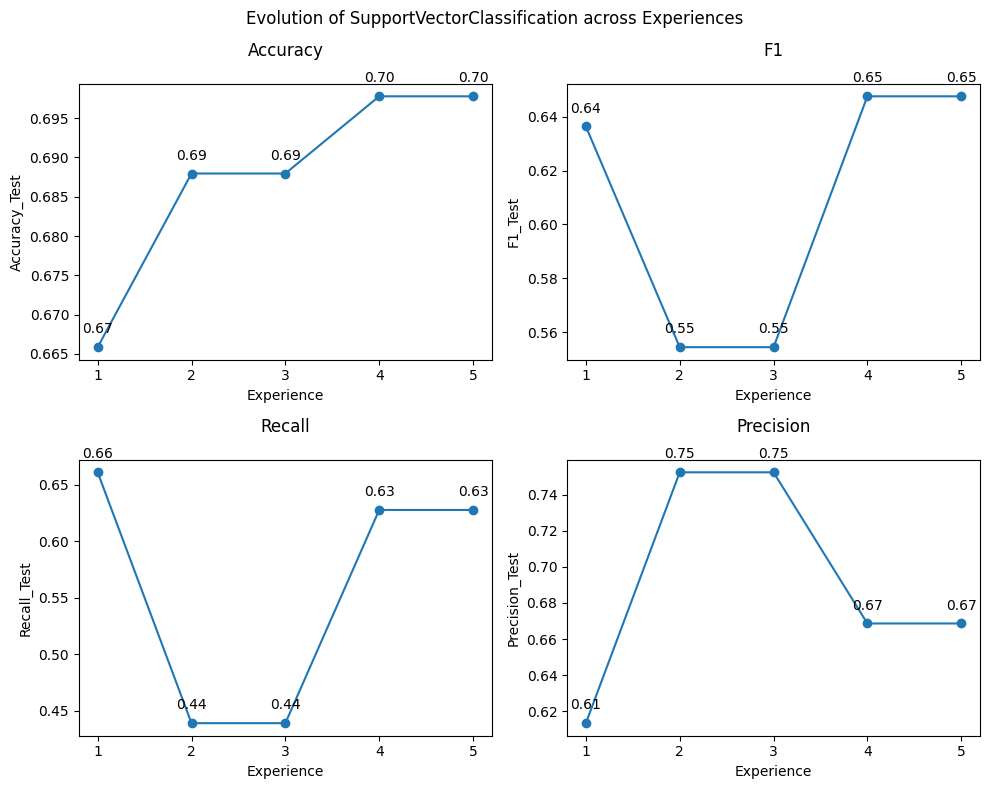

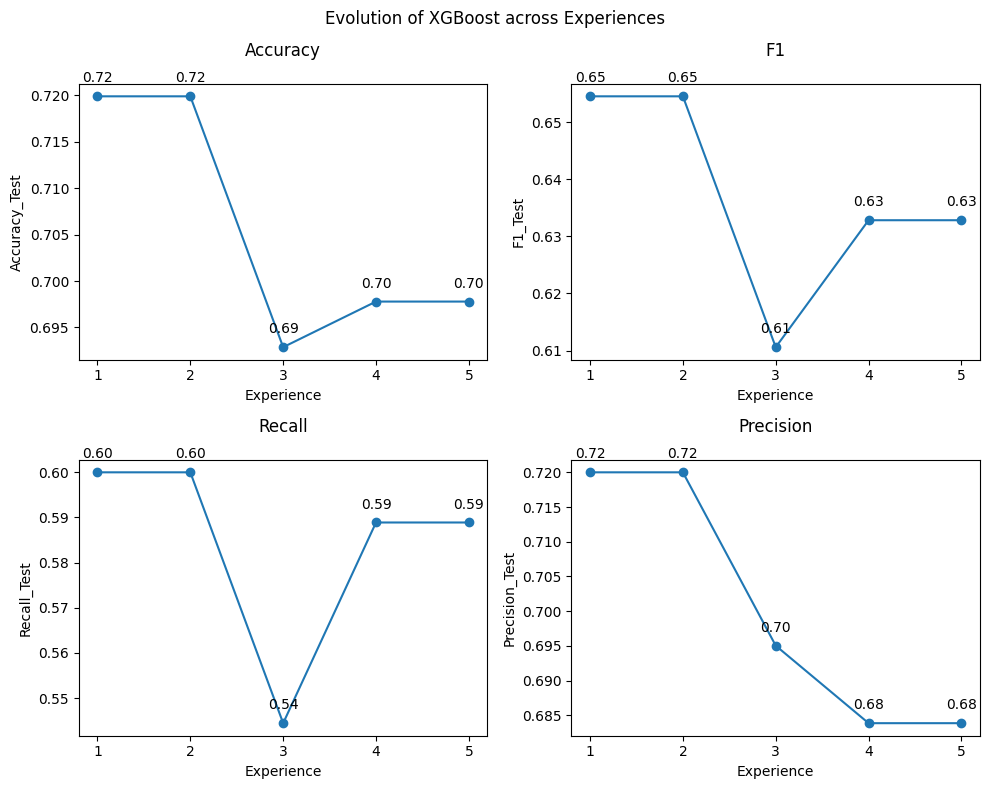

In [36]:
for model_name in models_list:
    #for df_metric, metric in metrics_list:
    show_report(get_model_metric(graph_df, model_name, metrics_c_list), model_name, metrics_list)

# Escolher o modelo final

O modelo com o melhor desempenho:
- Melhor Accuracy
- Desempate por F1
- Desempate por ROC_AUC
- Desempate por Precision
- Desempate por Recall

In [37]:
df_final = df_clean.copy()
df_final = df_final.sort_values(['Accuracy_Test', 'F1_Test', 'ROC_AUC_Test', 'Precision_Test', 'Recall_Test'], ascending=[False, False, False, False, False])

In [38]:
finalpath = './Analysis_Results/Experience' + str(experience_version_report) + "/finalreport.csv"
finalpath

'./Analysis_Results/Experience3/finalreport.csv'

In [39]:
df_final[['Model', 'Experience', 'Features_List', 'Nr_Features', 'Accuracy_Test', 'F1_Test', 'Precision_Test', 'Recall_Test', 'ROC_AUC_Test', 'TP', 'TN', 'FP', 'FN', '#Terminados(Teste)', '#AnuladosPosContrato(Teste)']].to_csv(finalpath, encoding="latin-1", index=False)